## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Importing pandas and numpy

In [1]:

import pandas as pd
import numpy as np
import sqlite3 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline




## Loading the data into a data frame

In [2]:
bom_df = pd.read_csv('zippedData/bom.movie_gross.csv')
bom_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


## 1. Data Understanding

In [3]:
#Inspection of the dataframe
print(bom_df.shape)
print(bom_df.columns)
print(bom_df.info())
print(bom_df.dtypes)

(3387, 5)
Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None
title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object


## Finding Duplicated Values


In [4]:
duplicates_list = []
for duplicate in bom_df.duplicated():
    duplicates_list.append(duplicate)
duplicate_set = set(duplicates_list)
duplicate_set
#There are no duplicates in this dataframe.

{False}

## Checking for missing Values and Filling them

In [5]:
bom_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [6]:
bom_df[bom_df['studio'].isna()]

,title,studio,domestic_gross,foreign_gross,year
210,Outside the Law (Hors-la-loi),NaN,96900.0,3300000,2010
555,Fireflies in the Garden,NaN,70600.0,3300000,2011
933,Keith Lemon: The Film,NaN,NaN,4000000,2012
1862,Plot for Peace,NaN,7100.0,NaN,2014
2825,Secret Superstar,NaN,NaN,122000000,2017


In [7]:
# Data for the missing values was not collected.
bom_df['studio'].fillna('Studio was not named', inplace=True)

In [8]:
#bom_df[bom_df['studio'] == 'UTV'].groupby('year').mean()
bom_df.iloc[:, 2]

0       415000000.0
1       334200000.0
2       296000000.0
3       292600000.0
4       238700000.0
           ...     
3382         6200.0
3383         4800.0
3384         2500.0
3385         2400.0
3386         1700.0
Name: domestic_gross, Length: 3387, dtype: float64

In [9]:
bom_df[bom_df['domestic_gross'].isna()]

,title,studio,domestic_gross,foreign_gross,year
230,It's a Wonderful Afterlife,UTV,NaN,1300000,2010
298,Celine: Through the Eyes of the World,Sony,NaN,119000,2010
302,White Lion,Scre.,NaN,99600,2010
306,Badmaash Company,Yash,NaN,64400,2010
327,Aashayein (Wishes),Relbig.,NaN,3800,2010
537,Force,FoxS,NaN,4800000,2011
713,Empire of Silver,NeoC,NaN,19000,2011
871,Solomon Kane,RTWC,NaN,19600000,2012
928,The Tall Man,Imag.,NaN,5200000,2012
933,Keith Lemon: The Film,Studio was not named,NaN,4000000,2012


In [10]:
#Fill in the missing values in domestic_gross with the mean 
bom_df['domestic_gross'].fillna(bom_df.iloc[:, 2].mean(), inplace=True)

In [11]:
bom_df[bom_df['foreign_gross'].isna()]

,title,studio,domestic_gross,foreign_gross,year
222,Flipped,WB,1800000.0,NaN,2010
254,The Polar Express (IMAX re-issue 2010),WB,673000.0,NaN,2010
267,Tiny Furniture,IFC,392000.0,NaN,2010
269,Grease (Sing-a-Long re-issue),Par.,366000.0,NaN,2010
280,Last Train Home,Zeit.,288000.0,NaN,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [12]:
#Create a Series of column foreign_gross and see its value_counts
bom_df.iloc[:, 3].value_counts()

1200000      23
1100000      14
4200000      12
1900000      12
2500000      11
             ..
236400000     1
88700         1
336700000     1
151800000     1
45000000      1
Name: foreign_gross, Length: 1204, dtype: int64

In [13]:
#Fill in the Nan values with the most common foreign gross values
bom_df['foreign_gross'].fillna('1200000', inplace=True)

In [14]:
bom_df['studio'].value_counts()

IFC          166
Uni.         147
WB           140
Magn.        136
Fox          136
            ... 
SMod           1
TFC            1
Good Deed      1
Arrow          1
JBG            1
Name: studio, Length: 258, dtype: int64

## 2. Exploratory Data Analysis

## Which year had the highest release of movies?

In [15]:
data = bom_df.groupby('year')['title'].count()

In [16]:
data
#2015 had the highest release of movies

year
2010    328
2011    399
2012    400
2013    350
2014    395
2015    450
2016    436
2017    321
2018    308
Name: title, dtype: int64

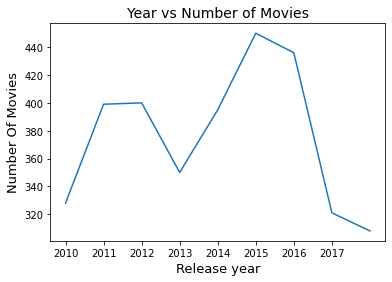

In [17]:
data.plot(xticks = np.arange(2010, 2018))
plt.title('Year vs Number of Movies', fontsize=14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13)
sns.set_style('whitegrid')

#After Seeing the plot and the output we can conclude that year 2015 year has the highest release of movies (450) followed by year 2016 (436) and year 2012 (400).

## Which year had the highest profit?

In [18]:
bom_df['domestic_gross']

0       415000000.0
1       334200000.0
2       296000000.0
3       292600000.0
4       238700000.0
           ...     
3382         6200.0
3383         4800.0
3384         2500.0
3385         2400.0
3386         1700.0
Name: domestic_gross, Length: 3387, dtype: float64

In [19]:
def minmax(x):
    max_index = bom_df[x].idxmax()
    min_index = bom_df[x].idxmin()
    highest_gross = pd.DataFrame(bom_df.loc[max_index,:])
    lowest_gross = pd.DataFrame(bom_df.loc[min_index,:])
    print('Movie with the highest ' + x + ':' , bom_df['title'][max_index])
    print('Movie with the lowest ' + x + ':' , bom_df['title'][min_index])
    return pd.concat([highest_gross, lowest_gross], axis=1)


In [20]:
minmax('domestic_gross')
#This function outputs the highest domestic gross and the lowest domestic gross

Movie with the highest domestic_gross: Star Wars: The Force Awakens
Movie with the lowest domestic_gross: Storage 24


,1872,1476
title,Star Wars: The Force Awakens,Storage 24
studio,BV,Magn.
domestic_gross,9.367e+08,100
foreign_gross,"1,131.6",1200000
year,2015,2013


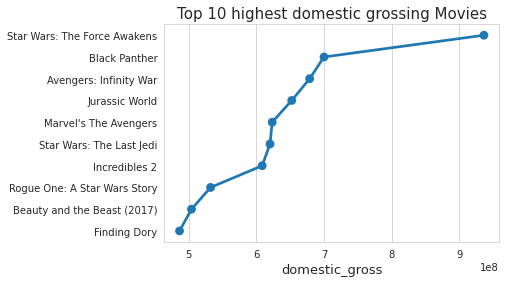

In [21]:
##make a plot which contain top 10 movies which the highest domestic_gross.
#sort the 'domestic_grossing' column in decending order and store it in the new dataframe,


info = pd.DataFrame(bom_df['domestic_gross'].sort_values(ascending=False))
info['title'] = bom_df['title']
data = list(map(str,(info['title'])))

x = list(data[:10])
y = list(info['domestic_gross'][:10])

ax = sns.pointplot(x=y,y=x)
ax.set_title("Top 10 highest domestic grossing Movies",fontsize = 15)
ax.set_xlabel("domestic_gross",fontsize = 13)
sns.set_style("darkgrid")

## Which studio has the highest domestic_gross

In [22]:
#studio_list = []
#for i in bom_df['studio']:
#    studio_list.append(i)
#studio_set = set(studio_list)
#studio_set

In [23]:
#bom_df[bom_df['studio'] == 'BV']

## Which year had the highest average domestic gross?

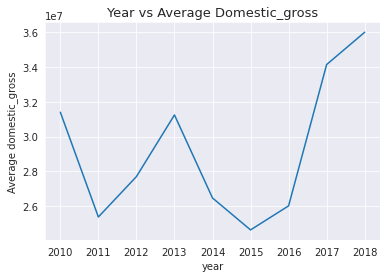

In [24]:
bom_df.groupby('year')['domestic_gross'].mean().plot()

plt.title('Year vs Average Domestic_gross' ,fontsize = 13)
plt.xlabel('year')
plt.ylabel('Average domestic_gross')

sns.set_style('darkgrid')

## Which studio had the highest release of movies

In [25]:
#make a function will will split the string and return the count of each studio.
def count_studio(x):
    #concatenate all the rows of studio
    data.plot = bom_df[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    info = data.value_counts(ascending=False)
    return info
top_studio_movies = count_studio('studio')

top_studio_movies.plot(kind='bar')



UnboundLocalError: local variable 'data' referenced before assignment